### Import modules

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter
import plotly
import plotly.figure_factory as ff
from pandas.plotting import parallel_coordinates
import numpy as np

%matplotlib inline

### Data load and transformation

In [2]:
education = pd.read_csv('ex6-2/education.csv')
crime = pd.read_csv('ex6-2/crimeratesbystate-formatted.csv')
birthrate = pd.read_csv('ex6-2/birth-rate.csv')

# remove whitespaces from crime dataset (sine we have already encountered it)
education = education.applymap(lambda x: x.strip() if type(x) is str else x)
crime = crime.applymap(lambda x: x.strip() if type(x) is str else x)
birthrate = birthrate.applymap(lambda x: x.strip() if type(x) is str else x)

### Histogram
Distribution of birth rate

In [3]:
birthrate_hist = pd.melt(birthrate, id_vars="Country", var_name="Year", value_name = 'BirthRate').fillna(0)
birthrate_hist["BirthRate_int"] = birthrate_hist["BirthRate"].apply(lambda x: math.ceil(x))
birthrate_hist.head()

,Country,Year,BirthRate,BirthRate_int
0,Aruba,1960,36.400,37
1,Afghanistan,1960,52.201,53
2,Angola,1960,54.432,55
3,Albania,1960,40.886,41
4,Netherlands Antilles,1960,32.321,33


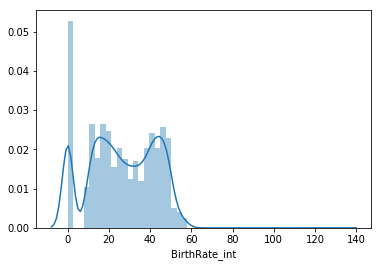

In [4]:
sns.distplot( birthrate_hist["BirthRate_int"] )

### Box plot
Comparison of birthrate betwen India and USA

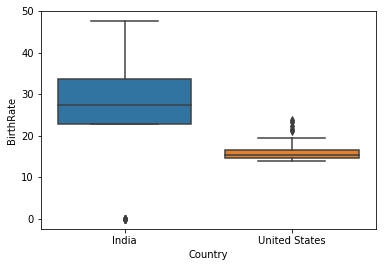

In [5]:
birthrate_box = birthrate_hist[(birthrate_hist["Country"]=="United States") | (birthrate_hist["Country"]=="India")]
sns.boxplot(x = birthrate_box["Country"], y=birthrate_box["BirthRate"])

### Bullet chart
US burglary statistics against some dummy benchmark

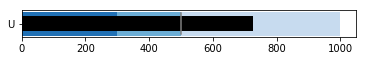

In [52]:
# transform data
crime_bullet = crime[crime["state"]=="United States"][["state","burglary"]]
crime_bullet['target'] = 500
crime_bullet_tuple = [tuple(x) for x in crime_bullet.values][0]

# set parameter for bullet chart
limits = [300, 500, 1000]
palette = sns.color_palette("Blues_r", len(limits))
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels(crime_bullet_tuple[0])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=75, color=palette[idx])
    prev_limit = lim
    
# draw the value we're measuring
ax.barh([1], crime_bullet_tuple[1], color='black', height=45)

ax.axvline(crime_bullet_tuple[2], color="gray", ymin=0.10, ymax=0.9)

### Parallel Coordinate plot
Comparison of reading, writing and math numbers between 5 states

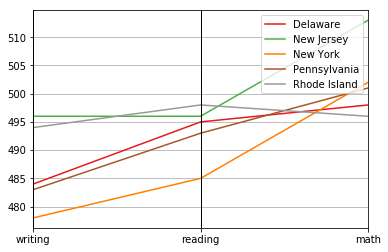

In [79]:
# transform data
education_parallel = education[education['state'].isin(['New York','New Jersey','Delaware','Rhode Island','Pennsylvania'])][['state','writing','reading','math']]

# make the plot
parallel_coordinates(education_parallel, 'state', colormap=plt.get_cmap("Set1"))
plt.show()

### Pie chart
Comparison of reading numbers between 5 states

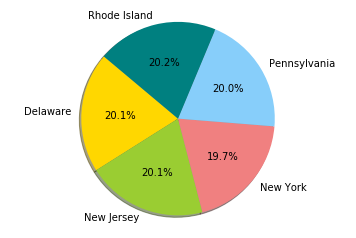

In [93]:
# transform data
education_pie = education_parallel[['state','reading']]

# set colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','teal']

# plot
plt.pie(education_pie['reading'], labels=education_pie['state'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Donought chart
Comparison of reading, writing and math numbers between 5 states

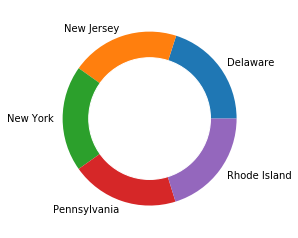

In [120]:
# transform data
education_donut = education_pie

# create a pieplot
plt.pie(education_donut['reading'], labels=education_donut['state'])
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()